**EXPLORATORY DATA ANALYSIS ON Loan Default Prediction DATASET**

***IMPORTING NECESSARY LIBRARIES***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

***LOADING THE DATASET***

In [4]:
df = pd.read_csv("/content/Loan_default.csv")

***ABOUT THE DATASET***

In [77]:
print("Shape of dataset")
print("Shape of dataset:", df.shape)

Shape of dataset
Shape of dataset: (255347, 18)


In [78]:
print("Data types & missing values")
print(df.info())

Data types & missing values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-n

In [79]:
print("Summary statistics for numerical columns")
print(df.describe().T)

Summary statistics for numerical columns
                   count           mean           std      min       25%  \
Age             255347.0      43.498306     14.990258     18.0     31.00   
Income          255347.0   82499.304597  38963.013729  15000.0  48825.50   
LoanAmount      255347.0  127578.865512  70840.706142   5000.0  66156.00   
CreditScore     255347.0     574.264346    158.903867    300.0    437.00   
MonthsEmployed  255347.0      59.541976     34.643376      0.0     30.00   
NumCreditLines  255347.0       2.501036      1.117018      1.0      2.00   
InterestRate    255347.0      13.492773      6.636443      2.0      7.77   
LoanTerm        255347.0      36.025894     16.969330     12.0     24.00   
DTIRatio        255347.0       0.500212      0.230917      0.1      0.30   
Default         255347.0       0.116128      0.320379      0.0      0.00   

                      50%        75%       max  
Age                 43.00      56.00      69.0  
Income           82466.0

In [80]:
print("Summary statistics for categorical columns")
print(df.describe(include=['object', 'category']).T)

Summary statistics for categorical columns
                 count  unique         top    freq
LoanID          255347  255347  ZTH91CGL0B       1
Education       255347       4  Bachelor's   64366
EmploymentType  255347       4   Part-time   64161
MaritalStatus   255347       3     Married   85302
HasMortgage     255347       2         Yes  127677
HasDependents   255347       2         Yes  127742
LoanPurpose     255347       5    Business   51298
HasCoSigner     255347       2         Yes  127701


In [81]:
print("Missing value count")
print(df.isnull().sum())

Missing value count
LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64


***SUMMARY STATS***

In [13]:
print("DESCRIPTIVE STATS OF AGE COLUMN")
print(f'mean: {df["Age"].mean()}')
print(f'median: {df["Age"].median()}')
print(f'standard deviation: {df["Age"].std()}')
print(f'minimum: {df["Age"].min()}')
print(f'maximum: {df["Age"].max()}')
print(f'range: {df["Age"].max() - df["Age"].min()}')
print(f'variance: {df["Age"].var()}')
print(f'skewness: {df["Age"].skew()}')

DESCRIPTIVE STATS OF AGE COLUMN
mean: 43.498306226429136
median: 43.0
standard deviation: 14.99025841871018
minimum: 18
maximum: 69
range: 51
variance: 224.70784745971142
skewness: 0.0006978543690462524


***DISTRIBUTION PLOTS FOR KEY FEATURES***

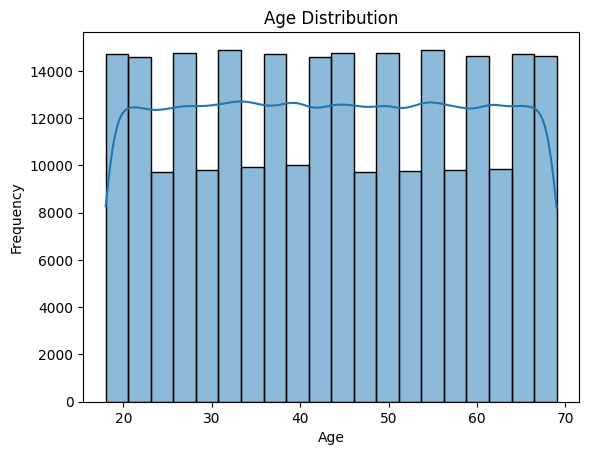

In [59]:
sns.histplot(df['Age'], bins=20,kde=True,fill=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

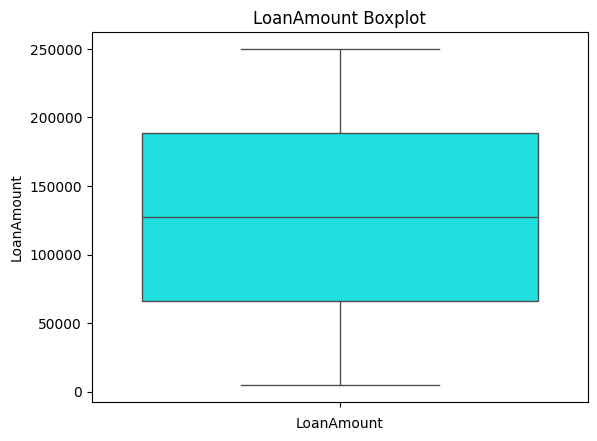

In [35]:
sns.boxplot(df['LoanAmount'],color='aqua')
plt.xlabel('LoanAmount')
plt.ylabel('LoanAmount')
plt.title('LoanAmount Boxplot')
plt.show()

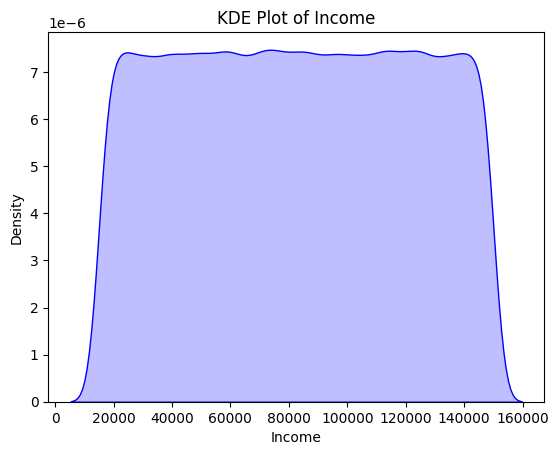

In [26]:
sns.kdeplot(df['Income'], fill=True, color="blue")
plt.title("KDE Plot of Income")
plt.xlabel("Income")
plt.ylabel("Density")
plt.show()

<Axes: xlabel='EmploymentType', ylabel='Default'>

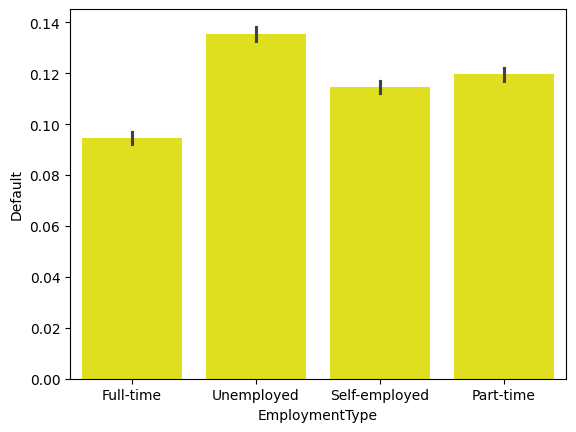

In [51]:
sns.barplot(df,x='EmploymentType',y='Default',color='yellow')

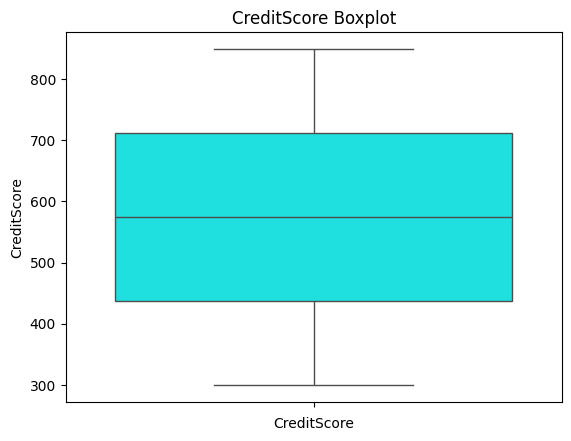

In [61]:
sns.boxplot(df['CreditScore'],color='aqua')
plt.xlabel('CreditScore')
plt.title('CreditScore Boxplot')
plt.show()

<Axes: xlabel='HasCoSigner', ylabel='Default'>

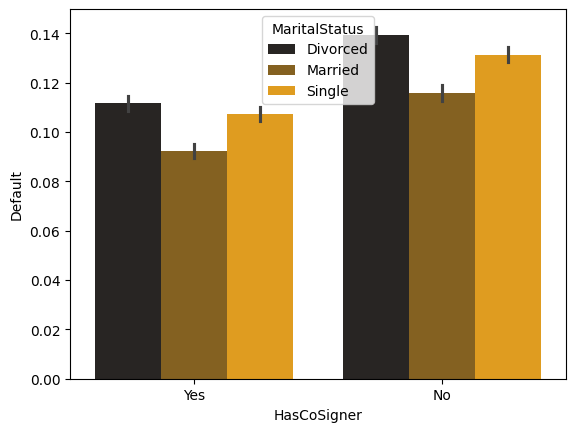

In [58]:
sns.barplot(df,x='HasCoSigner',y='Default',hue='MaritalStatus',palette='dark:orange')

***CORRELATION HEATMAP***

In [64]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Default'],
      dtype='object')

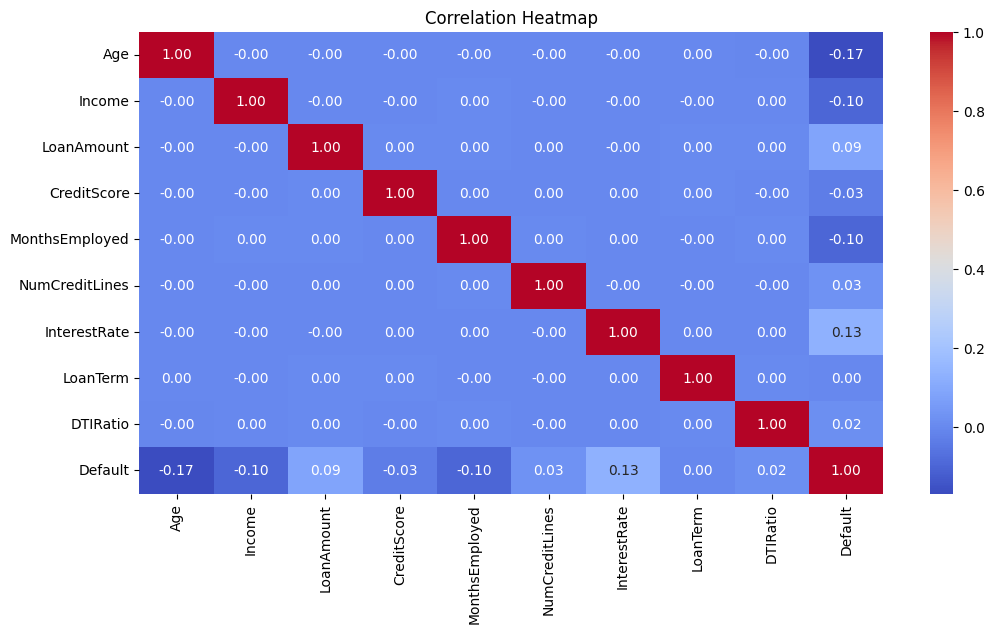

In [65]:
corr = df[numeric_cols].corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

***OUTLIER DETECTION***

In [69]:
print("OUTLIER COUNT IN EACH NUMERIC COLUMN")
outliers = {}

for col in numeric_cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR
  outlier_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
  outliers[col] = outlier_count

outliers

OUTLIER COUNT IN EACH NUMERIC COLUMN


{'Age': 0,
 'Income': 0,
 'LoanAmount': 0,
 'CreditScore': 0,
 'MonthsEmployed': 0,
 'NumCreditLines': 0,
 'InterestRate': 0,
 'LoanTerm': 0,
 'DTIRatio': 0,
 'Default': 29653}

***MISSING VALUE INSIGHTS***

In [74]:
df.isnull().sum()
#no null values present

,0
LoanID,0
Age,0
Income,0
LoanAmount,0
CreditScore,0
MonthsEmployed,0
NumCreditLines,0
InterestRate,0
LoanTerm,0
DTIRatio,0


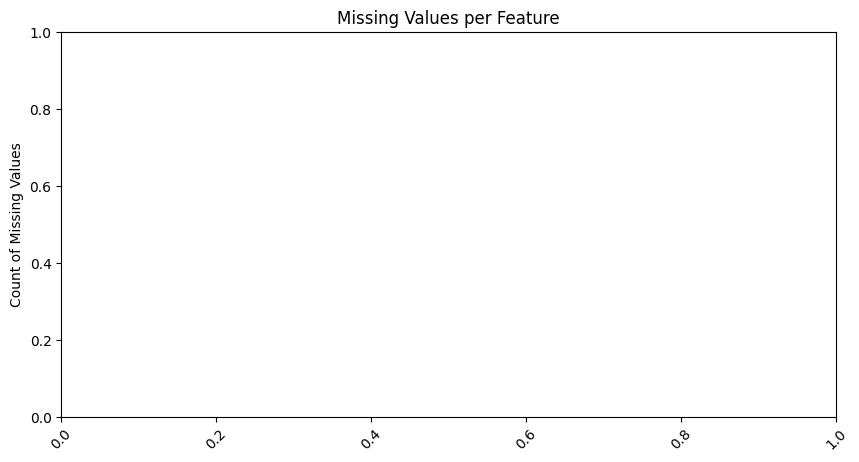

In [71]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=missing.index, y=missing.values, palette="viridis")
plt.title("Missing Values per Feature")
plt.ylabel("Count of Missing Values")
plt.xticks(rotation=45)
plt.show()